In [2]:
using Optimisers, Zygote, Random, Distributions, TaylorDiff, Plots

# Parámetros del modelo
SEED = 42
N_INPUTS = 1          # Número de entradas
N_OUTPUTS = 1         # Número de salidas
N_LAYERS = 3          # Número de capas ocultas
N_NODES = 10          # Número de nodos por capa
N_EPOCHS = 20_000     # Número de épocas
LEARNING_RATE = 1e-3
HIDDEN_DEPTH = 100
rng = MersenneTwister(SEED)

x = collect(range(0f0, 5f0, length=200))
x = reshape(x, 1, :) 

sigmoid(x) = 1.0f0 / (1.0f0 + exp(-x))

# Initialize the weights according to the Xavier Glorot initializer
uniform_limit = sqrt(6 / (1 + HIDDEN_DEPTH))
W = Float32.(rand(
    rng,
    Uniform(-uniform_limit, +uniform_limit),
    HIDDEN_DEPTH,
    1,
))
V = Float32.(rand(
    rng,
    Uniform(-uniform_limit, +uniform_limit),
    1,
    HIDDEN_DEPTH,
))
b = Float32.(zeros(HIDDEN_DEPTH))

parameters = (; W, V, b)

network_forward(x, p) = p.V * sigmoid.(p.W * x .+ p.b)

function loss_forward(p)
    f(x) = network_forward(x, p)
    derivative = TaylorDiff.derivative(f, x, Float32.(ones(size(x))), Val(1)) 
    y = sin.(4*x)
    return sum((derivative .- y).^2) / size(y, 2)
end

opt = Adam(LEARNING_RATE)
opt_state = Optimisers.setup(opt, parameters)
loss_history = []

for i in 1:N_EPOCHS
    loss, back = Zygote.pullback(loss_forward, parameters)
    push!(loss_history, loss)
    grad, = back(1.0)
    opt_state, parameters = Optimisers.update(opt_state, parameters, grad)
    if i % 100 == 0
        println("Epoch: $i, Loss: $loss")
    end
end

Epoch: 100, Loss: 0.5504531
Epoch: 200, Loss: 0.6363323
Epoch: 300, Loss: 0.6639576
Epoch: 400, Loss: 0.6639285
Epoch: 500, Loss: 0.6523928
Epoch: 600, Loss: 0.6359022
Epoch: 700, Loss: 0.6177346
Epoch: 800, Loss: 0.59967494
Epoch: 900, Loss: 0.58266866
Epoch: 1000, Loss: 0.5671604
Epoch: 1100, Loss: 0.55329937
Epoch: 1200, Loss: 0.54106784
Epoch: 1300, Loss: 0.53036135
Epoch: 1400, Loss: 0.52103674
Epoch: 1500, Loss: 0.5129393
Epoch: 1600, Loss: 0.5059179
Epoch: 1700, Loss: 0.49983287
Epoch: 1800, Loss: 0.49455863
Epoch: 1900, Loss: 0.48998463
Epoch: 2000, Loss: 0.4860146
Epoch: 2100, Loss: 0.48256552
Epoch: 2200, Loss: 0.47956598
Epoch: 2300, Loss: 0.47695455
Epoch: 2400, Loss: 0.47467902
Epoch: 2500, Loss: 0.47269422
Epoch: 2600, Loss: 0.47096172
Epoch: 2700, Loss: 0.46944827
Epoch: 2800, Loss: 0.4681256
Epoch: 2900, Loss: 0.4669691
Epoch: 3000, Loss: 0.46595764
Epoch: 3100, Loss: 0.46507293
Epoch: 3200, Loss: 0.46429908
Epoch: 3300, Loss: 0.46362227
Epoch: 3400, Loss: 0.46303073
Ep

In [110]:
f(x) = network_forward(x, parameters)

f (generic function with 1 method)

In [111]:
y_pred

1×100 Matrix{Float64}:
 -1.16445  -1.16393  -1.1634  -1.16287  …  -1.11319  -1.11266  -1.11213

In [112]:
derivative = TaylorDiff.derivative(f, x, Float32.(ones(size(x))), Val(1)) 

1×100 Matrix{Float32}:
 -0.0502613  -0.0557476  -0.0619617  -0.0689962  …  -0.00275704  -0.00871853

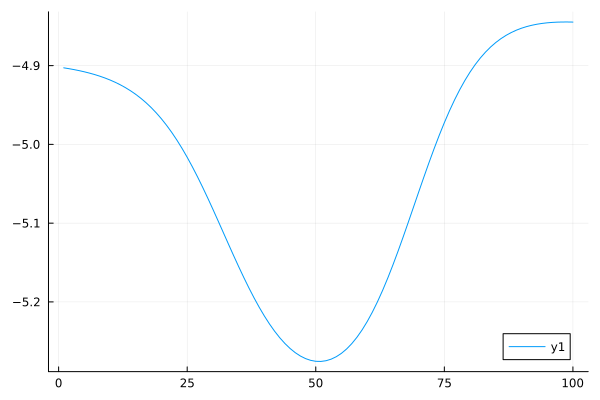

In [115]:
plot(f(x)')

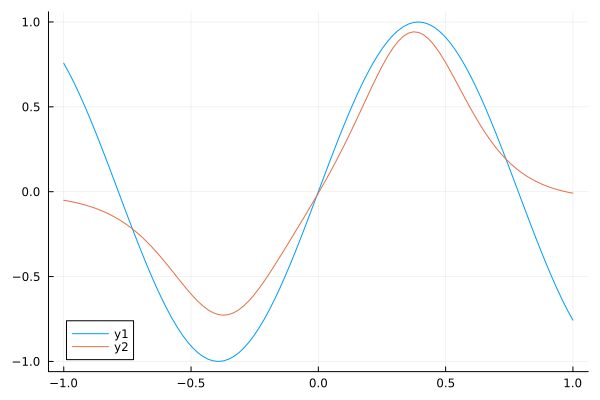

In [114]:
plot(x', sin.(4*x)')
plot!(x', derivative')